# Signal Reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Fourier Coefficients and the Fourier Cosine Transform and Fourier Sine Transform

###### The Fourier Cosine Coefficient is given by $$a_k = (f,\cos(kx)) = \frac1{2\pi}\int_{-\pi}^\pi f(x)\cos(kx)\,dx$$

###### The Fourier Sine Coefficient is given by $$b_k = (f,\sin(kx)) = \frac1{2\pi}\int_{-\pi}^\pi f(x)\sin(kx)\,dx$$

###### But our data will be discrete, so we need to approximate these coefficients using a quadrature rule. We will use the trapezoidal rule and this discretization results in the so-called Discrete Fourier Transform.

### Discrete Cosine Transform (DCT)

###### What is the algorithm for the Fourier cosine coefficient $\displaystyle a_k = \frac1{2\pi}\int_{-\pi}^\pi f(x)\cos(kx)\,dx$?

###### Let $N_k = 8$ (frequency grid) and $npts = 16$ (x grid) to start. Notice that
* $h = \frac{2\pi}{npts-1}$ so multiplying by $\frac{1}{2\pi}$ yields a factor of $\frac{1}{npts-1}$ in front of the trapezoidal rule
* The integrand is assumed to be $2\pi$ periodic so we can discard one of the endpoints and we will choose the left endpoint
* The weights for the trapezoidal rule are $\vec{w} = [\frac12, 1, 1, \ldots, 1, \frac12]$ but the assumption of periodicity means that we assume that the first and final endpoints yield the same result, so we are adding them together in the sum yielding $\vec{w} = [1, 1, 1, \ldots, 1]$
* Computationally we can ignore the weight vector and simply compute the dot product of $f(x)$ and the cosine kernel.

In [5]:
Nk = 16
npts = 33
x = np.linspace(-np.pi,np.pi,npts)
x = x[:-1] # Cosine is 2pi periodic so discard the right endpoint
k = np.arange(-Nk/2+1,Nk/2+1)
k = np.c_[k]
f = 1/np.cosh(x)
C = np.cos(k*x)
a = C.dot(f)/(npts-1)
print(a)

[ 6.61119128e-04 -7.53689803e-04  1.53401670e-03  1.64696646e-04
  1.18144809e-02  3.75545234e-02  2.13096438e-01  4.72418433e-01
  2.13096438e-01  3.75545234e-02  1.18144809e-02  1.64696646e-04
  1.53401670e-03 -7.53689803e-04  6.61119128e-04 -5.17453498e-04]


###### Collocate the function $f(x) = \frac1{\cosh(x)}$

######  $b_k=0~\forall k$ so the trigonometric interpolant (Fourier series) is (Cosine series) $$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx_j) = f_j$$

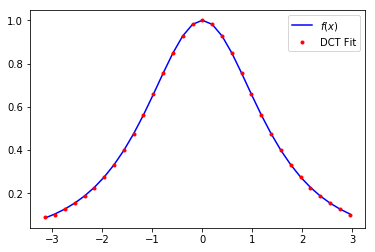

In [6]:
plt.plot(x,f,'b',x,a.dot(C),'r.')
plt.legend(['$f(x)$','DCT Fit']);

In [7]:
S = np.sin(k*x)
print('bk = {}'.format(S.dot(f)/(npts-1)))

bk = [-4.07660017e-17 -1.56125113e-17  7.41594286e-17  1.99493200e-17
 -4.48859699e-17 -1.90819582e-17  1.06251813e-17  0.00000000e+00
 -1.06251813e-17  1.90819582e-17  4.48859699e-17 -1.99493200e-17
 -7.41594286e-17  1.56125113e-17  4.07660017e-17  4.38017678e-17]


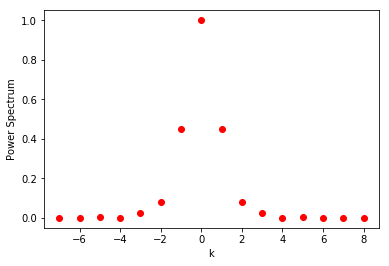

In [8]:
pwr_spectrum = np.fabs(a)
pwr_spectrum = pwr_spectrum/pwr_spectrum.max()
plt.plot(k,pwr_spectrum,'ro')
plt.xlabel('k')
plt.ylabel('Power Spectrum');

In [13]:
k[pwr_spectrum>0.4]

array([[-1.],
       [ 0.],
       [ 1.]])

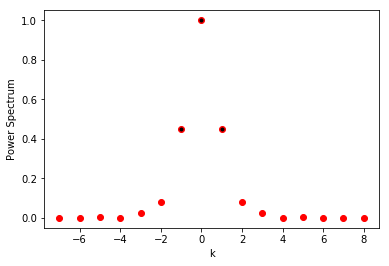

In [15]:
kr = np.c_[k[pwr_spectrum>0.4]]
ar = a[pwr_spectrum>0.4]
plt.plot(k,pwr_spectrum,'ro',kr,pwr_spectrum[pwr_spectrum>0.4],'k.')
plt.xlabel('k')
plt.ylabel('Power Spectrum');

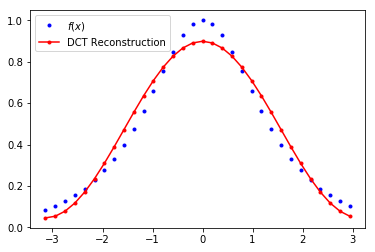

In [16]:
Cr = np.cos(kr*x)
plt.plot(x,f,'b.',x,ar.dot(Cr),'r.-')
plt.legend(['$f(x)$','DCT Reconstruction']);